NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [2]:
import os
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize

In [3]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def normie(df):
    print('cleaning . . .')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        clean = ''
        j = row.split(' ') #j is array of string
        for word in j:
            clean = clean + ' ' + normalize(word) #spell(word)[0] #correct(word)
        df['cleaned1'].iloc[i] = clean
        i += 1
    print('done cleaning by normalization')
    return df['cleaned1']
def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']




In [4]:
df_all = pd.read_csv("./df_y4s2_v1_Natt48.csv") #have chad chat 48 true entries
df_1 = pd.read_csv("./df_y4s2_final_new.csv")
df_all1 = pd.concat([df_all,df_1])
df_all1['Chadchad'] = df_all1['Chadchad'].fillna('no')
df_all1 = df_all1.drop_duplicates(subset='tweet_text', keep='last')
#df_all1.shape #(3646, 17)
df_a = df_all1


random drop false num_drop(3008 data entries) for resolve imbalance data

In [5]:
num_drop = int(df_a[df_a['relevant'] == False].shape[0]) - int(df_a[df_a['relevant'] == True].shape[0])
np.random.seed(int(time.time()))
false_rows = df_a[df_a['relevant'] == False]
rows_to_keep = false_rows.sample(n=319, random_state=42) 

df_dropped = df_a[df_a['relevant'] != False]
df_a = pd.concat([df_dropped,rows_to_keep])
df_a['relevant'].value_counts() #balanced

relevant
True     319
False    319
Name: count, dtype: int64

In [6]:
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) #use in X
#df_a['cleaned'] = normie(df_a)
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1) #use in counting words

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''


Are you alone?
done cleaning alone


C:\Users\natkn\AppData\Local\Temp\ipykernel_20376\3342053473.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_20376\3342053473.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_20376\3342053473.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].il

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [7]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'relevant' if x else 'not relevant')
df_a['contain_area'],df_a['contain_area'] = '2','2'
for i in range(df_a['split_cleaned'].shape[0]):
    if 'ดี' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_area'].iloc[i] = '1'
    else:
        df_a['contain_area'].iloc[i] = '0'

for i in range(df_a['split_cleaned'].shape[0]):
    if 'พื้นที่' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_area'].iloc[i] = '1'
    else:
        df_a['contain_area'].iloc[i] = '0'
df_a = df_a.dropna(subset=['tweet_text'])

C:\Users\natkn\AppData\Local\Temp\ipykernel_20376\4036014137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_20376\4036014137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_20376\4036014137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] =

In [63]:
int(df_a.shape[0])

638

In [9]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [10]:
df_a['word_length'].sort_values(ascending=False) 

2768    132
2770     93
2783     79
2797     76
2771     76
       ... 
2524      4
1233      4
2753      4
2112      2
2758      2
Name: word_length, Length: 638, dtype: int64

In [94]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, SpatialDropout1D, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras import backend as K

MAX_WORDS = 3000  # Memorized words
MAX_SEQUENCE_LENGTH = 132 
EMBEDDING_DIM = 100
epochs = 50
batch_size = 32

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
# Addding Pau anal---------

contain_good = df_a['contain_good'].to_numpy()
good_reshaped = np.reshape(contain_good, (contain_good.shape[0], 1))
good_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in good_reshaped[n][0]] #list in int 
np_good = np.array(good_reshaped)
good_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

contain_area = df_a['contain_area'].to_numpy()
area_reshaped = np.reshape(contain_area, (contain_area.shape[0], 1))
area_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in area_reshaped[n][0]] #list in int 
np_area = np.array(area_reshaped)
area_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

# Use np.hstack to append new column to the right
X = np.hstack((X, good_reshaped))
X = np.hstack((X, area_reshaped))

# Ending Pau anal------

# Y = df_a['relevance_nlp'].values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)


In [98]:
# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

MAX_SEQUENCE_LENGTH_pau = MAX_SEQUENCE_LENGTH + 2 #when use ดี พื้นที่

# Define and compile the model
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH_pau))
#model.add(Dense(64, activation='relu'))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_m]) #, precision_m, recall_m

model.summary()

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 134, 100)          300000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 134, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 380501 (1.45 MB)
Trainable params: 380501 (1.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 8s 227ms/step - loss: 0.6925 - f

In [41]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, SpatialDropout1D, Dense, Bidirectional, Flatten, LSTM
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.optimizers import Adam

MAX_WORDS = 2500  # Memorized words
MAX_SEQUENCE_LENGTH = 132 
EMBEDDING_DIM = 100
epochs = 50
batch_size = 32

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#Y = df_a['relevance_nlp'].values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Dense(64, activation='relu'))  # Add a dense layer before LSTM
model.add(SpatialDropout1D(0.1))
model.add(Bidirectional(LSTM(100, dropout=0.1, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
#sgd = SGD(lr=0.001, momentum=0, nesterov=True) #0.2 F1 score 0.3 precision ...
#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics=[f1_m]) #, precision_m, recall_m
model.build(input_shape=(None, 10))
model.summary()

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 132, 100)          250000    
                                                                 
 dense_31 (Dense)            (None, 132, 64)           6464      
                                                                 
 spatial_dropout1d_16 (Spat  (None, 132, 64)           0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_15 (Bidirect  (None, 200)               132000    
 ional)                                                          
                                                                 
 dense_32 (Dense)            (None, 1)                 201       
                                                                 
Total params: 388665 (1.48 MB)
Trainable params: 3886

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
f1_score = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, f1_score))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

4/4 [==============================] - 0s 49ms/step - loss: 0.6125 - f1_m: 0.7106
Test set evaluate
  Loss: 0.612
  F1 Score: 0.711
4/4 [==============================] - 1s 41ms/step
Precision: 0.689
Recall: 0.656
F1 Score: 0.672



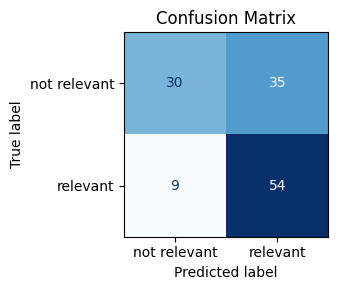

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

#plt.savefig('./img/confusion_relevant_ori_trafbal_notnorm_alone.png') # Save the figure before showing
plt.show()

save model

In [74]:
model_json = model.to_json()
with open("./model/relevant_arch_ori_n_trafbal.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_w_ori_n_trafbal.h5')

medium

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model architecture
model = Sequential()

# Add an embedding layer to convert input sequences to dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True)))

# Add a dense output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

old code

In [ ]:
#clean by word_vector (thai2vec) --took 4.38 sec/1 updated 'cleaned1' row
from pythainlp import word_vector
model = word_vector.WordVector(model_name="thai2fit_wv").get_model() #for spell correction
words = model.index_to_key

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

thai_letters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮะัาำิีึืุูเแโใไ็่้๊๋์'

def words(text): return re.findall(r'\w+', text.lower())

def P(word):
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = thai_letters
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)

# Get current axis and adjust figure size to fit the matrix
plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(cm.shape[1], cm.shape[0])  # Set figure size based on matrix dimensions

plt.title('Confusion Matrix')

# Save the figure before showing
plt.savefig('./img/confusion_relevant_ori_trafbal') #_ori_trafbal'

plt.show()


In [1]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))


# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)


NameError: name 'model' is not defined

ROC AUC: 0.500


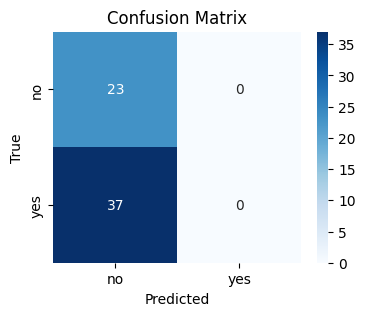

In [55]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test, y_pred)
print('ROC AUC: %.3f' % score)
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()